# AfterWork Data Science: Data Visualisation with Seaborn


## 1. Business Understanding




As a data analyst working with Quick Mart chain of supermarkets, the task is to create an analysis report, complete with recommendations to guide the management team on a marketing strategy decision.

The report should include:
- Which product categories performed best.
- Which branches had the highest sales and profits
- What key trends in sales in each branch are noticeable over the time.
- The average amount spent by customers for each branch.
The average rating for each branch.

## 2. Data Exploration

In [1]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
 

In [2]:
# Loading the dataset
# --- 
# Dataset url = https://bit.ly/SupermarketsDS
# --- 
# YOUR CODE GOES HERE
Quickmart = pd.read_csv('https://bit.ly/SupermarketsDS')
Quickmart

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# Determining the size 
# ---
# YOUR CODE GOES HERE
Quickmart.shape

(1000, 17)

In [4]:
# Checking the datatypes
# ---
# YOUR CODE GOES HERE
Quickmart.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
# Statistical summary
# ---
# YOUR CODE GOES HERE
Quickmart.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## 3. Data Cleaning

In [6]:
# Checking for duplicates 
# ---
# YOUR CODE GOES HERE
Quickmart.duplicated().sum()

0

In [7]:
# Checking for missing values 
# ---
# YOUR CODE GOES HERE
Quickmart.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
# Dropping irrelevant columns
# ---
# YOUR CODE GOES HERE
Quickmart.drop(['Invoice ID','Tax 5%', 'City', 'Gender'], axis=1, inplace=True)

## 4. Data analysis and visualisation (Using Seaborn for visualisation)

We investigate the questions listed above in order to craft a fact-driven recommendation.

### 4.a) Questions

In [9]:
# Question 1 - Which product categories(Product_line) performed best.
# YOUR CODE GOES HERE
#Rating and product_line
Quickmart['Quantity'].groupby([Quickmart['Product line']]).mean()

Product line
Electronic accessories    5.711765
Fashion accessories       5.067416
Food and beverages        5.471264
Health and beauty         5.618421
Home and lifestyle        5.693750
Sports and travel         5.542169
Name: Quantity, dtype: float64

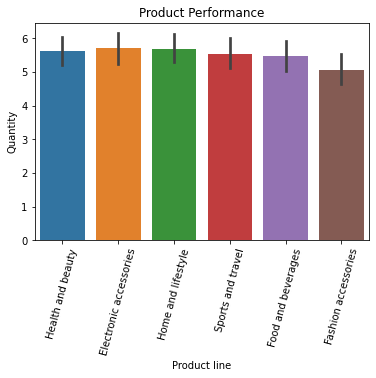

In [10]:
# Render 
sns.barplot(data = Quickmart, x = "Product line", y = "Quantity")

# Tweak and Label
plt.xticks(rotation = 75)
plt.xlabel('Product line')
plt.ylabel('Quantity')
plt.title('Product Performance')

# Display
plt.show()

In [11]:
# Question 2: Which branches had the highest sales and profits ?
# YOUR CODE GOES HERE
#profit= gross income
#Branches
#sales= Total
#
Quickmart['Total'].groupby([Quickmart['Branch']]).sum()


Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [12]:
Quickmart['gross income'].groupby([Quickmart['Branch']]).sum()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

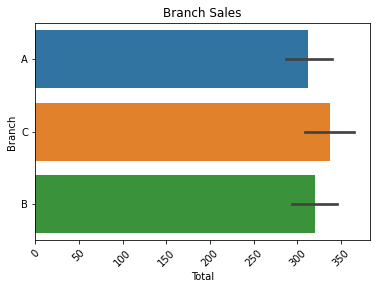

In [13]:
sns.barplot(data = Quickmart, x = "Total", y = "Branch")

# Tweak and Label 
plt.xticks(rotation = 45)
plt.xlabel('Total')
plt.ylabel('Branch')
plt.title('Branch Sales')

# Display
plt.show()

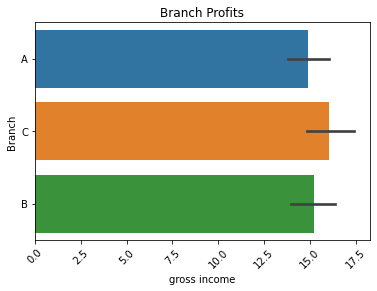

In [14]:
sns.barplot(data = Quickmart, x = "gross income", y = "Branch")

# Tweak and Label 
plt.xticks(rotation = 45)
plt.xlabel('gross income')
plt.ylabel('Branch')
plt.title('Branch Profits')

# Display
plt.show()

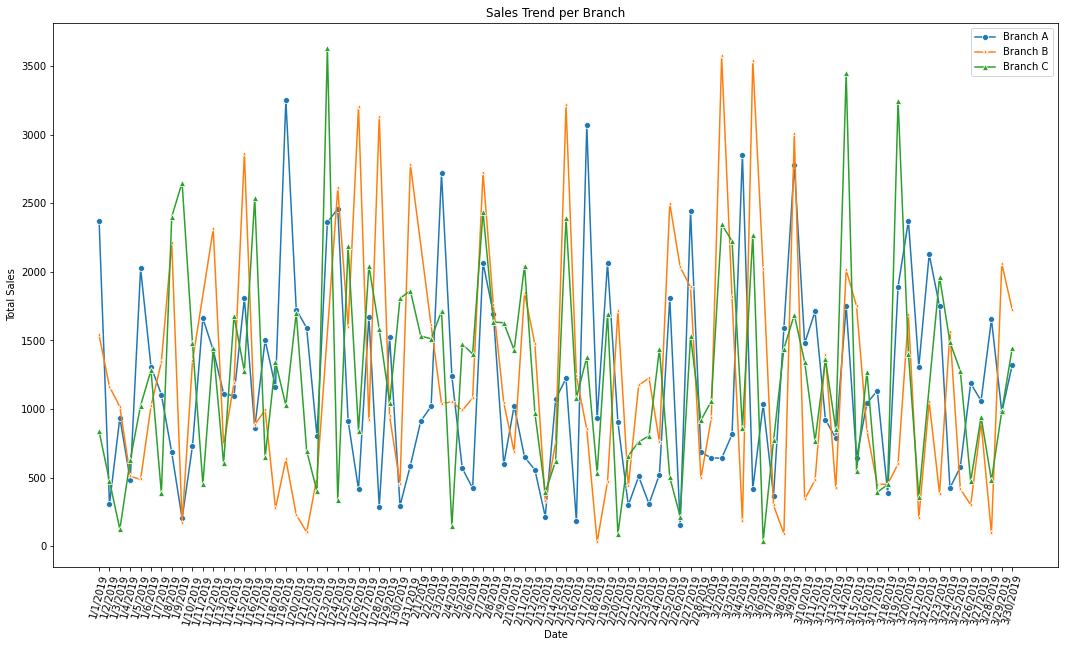

In [15]:
# Question 3: What key trends in sales in each branch are noticeable over the time.
# YOUR CODE GOES HERE
BranchA = Quickmart.groupby(['Date',Quickmart[Quickmart.Branch == 'A'].Branch], 
                              as_index = False)['Total'].sum().round(2)
BranchB = Quickmart.groupby(['Date',Quickmart[Quickmart.Branch == 'B'].Branch], 
                              as_index = False)['Total'].sum().round(2)
BranchC = Quickmart.groupby(['Date',Quickmart[Quickmart.Branch == 'C'].Branch], 
                              as_index = False)['Total'].sum().round(2)
branch_trends = BranchA.merge(BranchB, how = 'left', on='Date')

branch_trends1 = branch_trends.merge(BranchC, how = 'left', on='Date').sort_values(by="Date", key=pd.to_datetime)

plt.figure(figsize = (18, 10))
sns.lineplot(data = branch_trends1, x='Date', y = 'Total_x', marker="o", label = "Branch A", sort=False)
sns.lineplot(data = branch_trends1, x='Date', y = 'Total_y', marker="*", label = "Branch B", sort=False)
sns.lineplot(data = branch_trends1, x='Date', y = 'Total', marker="^", label = "Branch C", sort=False)

plt.xticks(rotation = 75)
plt.title('Sales Trend per Branch')
plt.ylabel('Total Sales')
plt.legend()

plt.show()

In [16]:
# Question 4(a): The average amount spent by customers for each branch.
# YOUR CODE GOES HERE
Quickmart['Total'].groupby([Quickmart['Branch']]).mean()


Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64

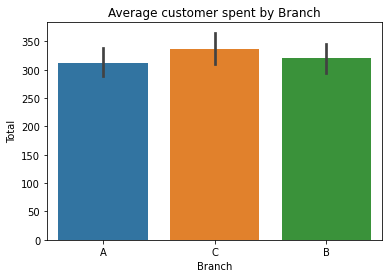

In [17]:
# Render 
sns.barplot(data = Quickmart, x = "Branch", y = "Total")

# Tweak and Label
plt.xlabel('Branch')
plt.ylabel('Total')
plt.title('Average customer spent by Branch')

# Display
plt.show()

In [18]:
# Question 4(b):The average rating for each branch.
# YOUR CODE GOES HERE
Quickmart['Rating'].groupby([Quickmart['Branch']]).mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

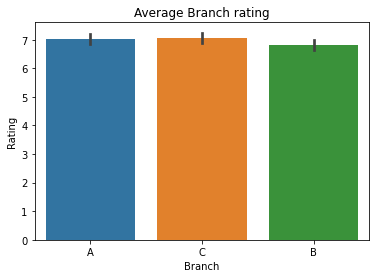

In [19]:
# Render 
sns.barplot(data = Quickmart, x = "Branch", y = "Rating")

# Tweak and Label
plt.xlabel('Branch')
plt.ylabel('Rating')
plt.title('Average Branch rating')

# Display
plt.show()

## 5. Summary of findings

What observations did you make from your analysis?


1. The products performance was as below
* Electronic accessories    5.711765
* Fashion accessories       5.067416
* Food and beverages        5.471264
* Health and beauty         5.618421
* Home and lifestyle        5.693750
* Sports and travel         5.542169
2. Branch C had the highest sales followed by branch A and B respectively
3. Branch C had the highest profits followed by branch A and B respectively
4. Branch C had the highest average spent by customers followed by branch B and A respectively

## 6. Recommendations

What recommendations can you make from your analysis/observations?


1. The Fashion accessories product_line needs more marketing as its lagging behind in performance
2. Branches A and B should benchmark with C to pick good practices on sales performance 